In [1]:
# Reference taken from in-class small graph demo
import networkx as nx
import matplotlib.pyplot as plt

#G = nx.Graph()
G = nx.DiGraph()

In [2]:
path = 'Dataset/test_trust_network.csv'
import pandas as pd
df = pd.read_csv(path)

In [3]:
#  https://stackoverflow.com/questions/28488559/networkx-duplicate-edges
G = nx.from_pandas_edgelist(df, 'user1', 'user2')

In [4]:
for index, row in df.iterrows():
    G.add_edge(row['user1'], row['user2'])

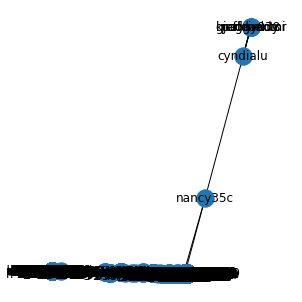

In [22]:
# https://networkx.github.io/documentation/stable/reference/drawing.html

plt.figure(figsize=(4,4))
#nx.draw_circular(G)
#nx.draw_random(G)
nx.draw_spectral(G, with_labels=True)
plt.show()

Text(0.5, 1.0, 'Node Graph for Trust Data')

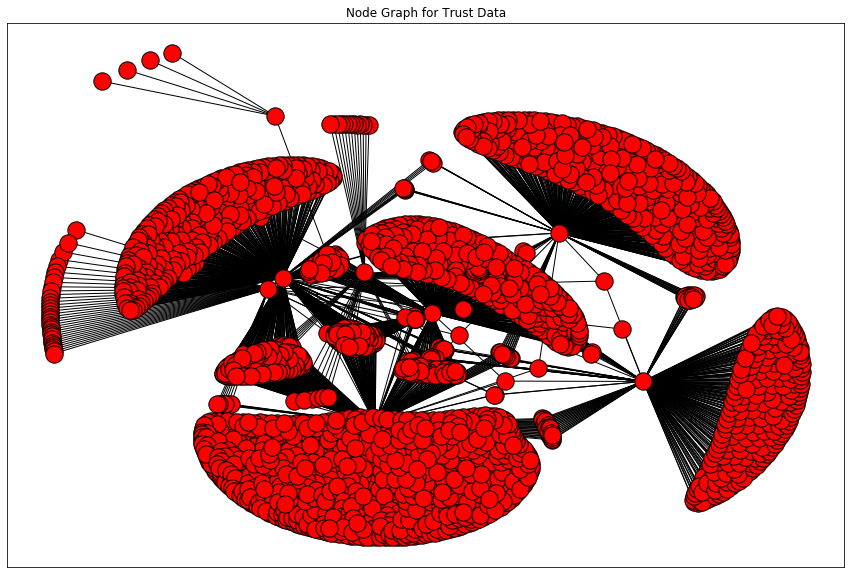

In [6]:
# https://networkx.github.io/documentation/stable/reference/drawing.html
# Section referred: Matplotlib, Graph Layout

plt.figure(figsize=(15,10))

#pos = nx.circular_layout(G)
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='red', edgecolors='black')
nx.draw_networkx_edges(G, pos)
plt.title('Node Graph for Trust Data')

In [7]:
print("number of edges=", len(G.edges()))
print("number of nodes=", len(G.nodes()))

number of edges= 2966
number of nodes= 2387


In [8]:
degree_centrality = nx.degree_centrality(G)

In [9]:
closeness_centrality = nx.closeness_centrality(G)

In [10]:
betweenness_centrality = nx.betweenness_centrality(G)

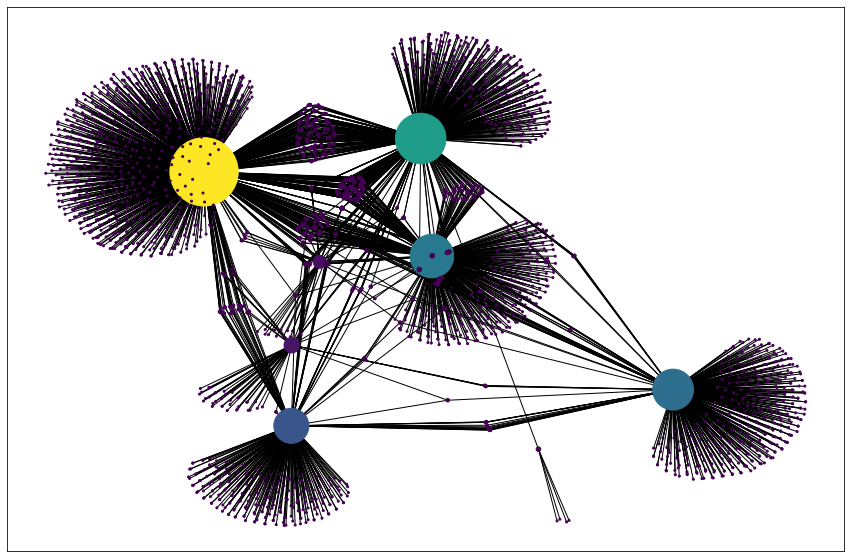

In [11]:
# reference: https://www.datacamp.com/community/tutorials/social-network-analysis-python

pos = nx.spring_layout(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in degree_centrality.values()]
plt.figure(figsize=(15,10))
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size )

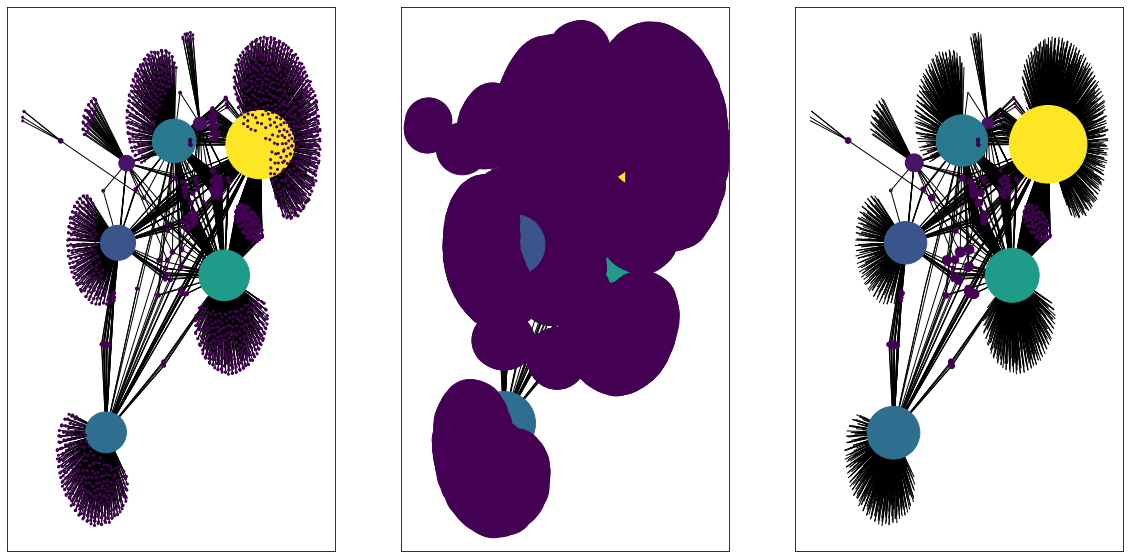

In [12]:
# reference: https://www.datacamp.com/community/tutorials/social-network-analysis-python
# https://matplotlib.org/3.1.1/gallery/recipes/create_subplots.html

# creating subplots for different centrality measures

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
pos = nx.spring_layout(G)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in degree_centrality.values()]
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, arrowstyle = '>')

plt.subplot(1,3,2)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in closeness_centrality.values()]
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, arrowstyle = '>')

plt.subplot(1,3,3)
node_color = [20000.0 * G.degree(v) for v in G]
node_size =  [v * 10000 for v in betweenness_centrality.values()]
nx.draw_networkx(G, pos=pos, with_labels=False, node_color=node_color, node_size=node_size, arrowstyle = '>')


In [13]:
# Reference: https://thispointer.com/python-how-to-sort-a-dictionary-by-key-or-value/

# printing top 10 users with highest degree centrality
print("\nDegree Centrality")
[(key , " : " , value) for (key, value) in sorted(degree_centrality.items() , reverse = True, key=lambda x: x[1])[:10]]



Degree Centrality


[('kristinafh', ' : ', 0.46689019279128247),
 ('cyndia', ' : ', 0.25565800502933783),
 ('amyk49', ' : ', 0.18943839061190276),
 ('cheerio77', ' : ', 0.1672254819782062),
 ('magenta321', ' : ', 0.12279966471081308),
 ('kmhinman', ' : ', 0.024308466051969825),
 ('spongebag7', ' : ', 0.017183570829840736),
 ('42english', ' : ', 0.0020955574182732607),
 ('surferdude7', ' : ', 0.0020955574182732607),
 ('melissasrn', ' : ', 0.0020955574182732607)]

In [14]:
# printing top 10 users with highest closeness centrality
print("\nCloseness Centrality")
[(key , " : " , value) for (key, value) in sorted(closeness_centrality.items() , reverse = True, key=lambda x: x[1])[:10]]



Closeness Centrality


[('amyk49', ' : ', 0.5217581456374372),
 ('kristinafh', ' : ', 0.5160034602076125),
 ('surferdude7', ' : ', 0.4624031007751938),
 ('ned1', ' : ', 0.4611519134132199),
 ('viper1963', ' : ', 0.4611519134132199),
 ('donnie013', ' : ', 0.4611519134132199),
 ('ifif1938', ' : ', 0.4611519134132199),
 ('bwyckoff1', ' : ', 0.4611519134132199),
 ('tbrown', ' : ', 0.4611519134132199),
 ('lark729_89', ' : ', 0.4572633192794174)]

In [15]:
# printing top 10 users with highest closeness centrality
print("\nBetweenness Centrality")
[(key , " : " , value) for (key, value) in sorted(betweenness_centrality.items() , reverse = True, key=lambda x: x[1])[:10]]



Betweenness Centrality


[('kristinafh', ' : ', 0.6013894148251046),
 ('cyndia', ' : ', 0.2897942930046638),
 ('cheerio77', ' : ', 0.2774653045622146),
 ('amyk49', ' : ', 0.26416665548269624),
 ('magenta321', ' : ', 0.17987722289676278),
 ('kmhinman', ' : ', 0.031874956423827226),
 ('spongebag7', ' : ', 0.012700437749882705),
 ('lark729_89', ' : ', 0.010164029057366748),
 ('42english', ' : ', 0.008634446659444753),
 ('melissasrn', ' : ', 0.00834881980133353)]

In [16]:
# using pagerank, finding most trusted users
trust_factor = nx.pagerank(G, alpha=1, tol = 1)


In [36]:
# printing top 10 users with highest degree centrality

trust_score = []

print("\nTrust Factor")
trust_score = [(key ,value) for key, value in sorted(trust_factor.items() , reverse = True, key=lambda x: x[1])]
trust_score[:10]


Trust Factor


[('kristinafh', 0.3862319001770956),
 ('cyndia', 0.18307939282750677),
 ('cheerio77', 0.1545952572501239),
 ('amyk49', 0.1388756180086143),
 ('magenta321', 0.10427314620862979),
 ('kmhinman', 0.018482742358998293),
 ('spongebag7', 0.00932991973201068),
 ('cyndialu', 0.0018153889121631057),
 ('nancy35c', 8.540081007240304e-05),
 ('kuuleimomi', 8.378718056137411e-05)]

In [37]:
type(trust_score[0])

tuple

#Building the Recommender System based on trust score

Adding the trust score field in the original review file
Approach: Trust score will be added to the review rating and an overall normalized rating will be recalculated in the range 1-5
The recommendations will be based on the new ratings

In [23]:
filepath = 'Dataset/epinion_preprocessed.csv'
import pandas as pd
df1 = pd.read_csv(filepath)
df1['user'] = df1['user'].str.lower()
df1.count()

item      188484
paid      188296
review    188484
stars     188484
time      188484
user      188483
dtype: int64

In [24]:
df1.head()

,item,paid,review,stars,time,user
0,pr-Sony_KV_36FS12__Standard_Televisions,1199,well when i graduated from college it didnt ta...,5,1012262400,pyros7
1,Minolta_QMS_PagePro_1250E_Printers,260,i got this printer from minolta as a warranty ...,4,1027296000,fgb59h
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1800,although i love my vaio especially the gorgeou...,2,1201305600,bucho_ky
3,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1000,this is my first laptop and i bought it about ...,4,1118016000,redp944
4,pr-Durabrand_CD-85_Personal_CD_Player,20,just recently my sony dej001 walkman died on m...,4,1149292800,spongebag7


In [29]:
df1.drop_duplicates(inplace = True)

In [40]:
trust_df = pd.DataFrame(trust_score)

In [42]:
trust_df.columns = ['user','trust_score']

In [43]:
trust_df.head()

,user,trust_score
0,kristinafh,0.386232
1,cyndia,0.183079
2,cheerio77,0.154595
3,amyk49,0.138876
4,magenta321,0.104273


In [44]:
result_df = pd.merge(df1, trust_df, how='left', on='user')

In [48]:
result_df.head(20)

,item,paid,review,stars,time,user,trust_score
0,pr-Sony_KV_36FS12__Standard_Televisions,1199,well when i graduated from college it didnt ta...,5,1012262400,pyros7,NaN
1,Minolta_QMS_PagePro_1250E_Printers,260,i got this printer from minolta as a warranty ...,4,1027296000,fgb59h,NaN
2,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1800,although i love my vaio especially the gorgeou...,2,1201305600,bucho_ky,NaN
3,Sony_VAIO_PCG_K45_P4_538_3_2GHz_1MB_L2_533MHz_...,1000,this is my first laptop and i bought it about ...,4,1118016000,redp944,NaN
4,pr-Durabrand_CD-85_Personal_CD_Player,20,just recently my sony dej001 walkman died on m...,4,1149292800,spongebag7,0.009330
5,pr-Sony_KV_36FS12__Standard_Televisions,1350,out of the box its an impressive television it...,4,982281600,daleb,NaN
6,pr-Sony_KV_36FS12__Standard_Televisions,1200,when i first bought this tv i was pleased with...,1,1109116800,tarsyn,NaN
7,pr-Sony_KV_36FS12__Standard_Televisions,1350,the only real gripe is just the insane weight ...,5,981158400,genkle1,NaN
8,cmhd-Monitors-All-Nokia_447Xi_Plus,0,as much as i wanted a 19 at the time i just di...,4,1052352000,shadeybeep,NaN
9,century-novelty-harry-potter-gryffindor-house-...,14,you dont need spells to keep you cozy this sea...,5,1337299200,kelsey34491,NaN


In [ ]:
result_df